Matplotlib 3.0.2
NumPy 1.15.4
Python 3.6.8


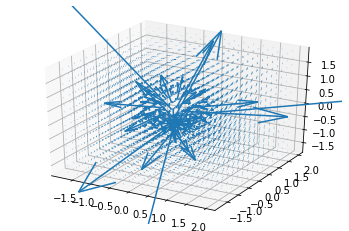

In [4]:
from mpl_toolkits.mplot3d import axes3d
from platform import python_version
from typing import Tuple
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
"""
Project: Magnetic dipole simulation
Linter: flake8
Formatter: yapf
Maintainer(s): lev1ty (Adam Yu)

Simulate the field around a magnetic dipole
according to the below link to formula.
https://wikimedia.org/api/rest_v1/media/math/render/svg/0991963d60a114ec41900b0eec04c944d03bb603

Notes:

mu_0 is the vacuum permeability and is defined as:
mu_0 = 4 * pi E -7 H/m
Henry per meter is the SI unit for magnetic field flux.

Thus, the constant term in the formula is 1E-7 H/m.
"""


def simulate(m: np.ndarray, r: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute magnetic field vectors at each position `r`
    derived from the magnetic dipole moment `m`.

    Args:
        m (np.ndarray): (3, 1) shape array representing magnetic dipole.
        r (np.ndarray): (n, 3) shape array representing points.

    Returns:
        `r` with point near zero removed.
        (n, 3) shape array representing mangetic field vectors.
    """
    # filter rows containing any zeros in components
    r = r[np.any(r, axis=1)]

    # numerator on major termÏ
    prod = (3 * (r @ m)).reshape(-1, 1) * r  # (n, 3) shape array
    # magnitude
    r_magnitude = np.linalg.norm(r, axis=1).reshape(-1,
                                                    1)  # (n, 1) shape array

    # major term
    r5 = np.power(r_magnitude, 5)  # (n, 1) shape array
    major = prod / r5  # (n, 3) shape array

    # minor term
    r3 = np.power(r_magnitude, 3)  # (n, 1) shape array
    minor = m / r3

    return r, 1e-7 * (major - minor)


def grid_points(*axis) -> np.ndarray:
    """
    Generates points to populate the space defined by `axis`.

    Args:
        axis (np.s_): Coordinate space axis represented by NumPy slice notation.
    
    Returns:
        (n, 3) shape array of all points in coordinate space.
    """
    return np.array([a.ravel() for a in np.mgrid[axis]]).T


if __name__ == "__main__":
    # check versioning
    print(f"Matplotlib {matplotlib.__version__}")
    print(f"NumPy {np.__version__}")
    print(f"Python {python_version()}")

    # simulation
    axis = (np.s_[-1.8:2:.25], np.s_[-1.8:2:.25], np.s_[-1.8:2:.25])
    r = grid_points(*axis)
    m = np.array([0, 0, 1])
    r, B = simulate(m, r)

    # plot
    x, y, z = r.T[0], r.T[1], r.T[2]
    u, v, w = B.T[0], B.T[1], B.T[2]

    fig = plt.figure()
    plot = fig.gca(projection='3d')
    plot.quiver(x, y, z, u, v, w, length=5e5)